In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))


In [11]:
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(64, activation='swish')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
es = EarlyStopping (monitor='loss', patience = 10, restore_best_weights=True)

history = autoencoder.fit(
    x_train, x_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks = [es]
)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0808 - val_loss: 0.0271
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0249 - val_loss: 0.0201
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0191 - val_loss: 0.0168
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0163 - val_loss: 0.0151
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0136 - val_loss: 0.0131
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 12/100
235/235 ━━━━━━━━━━━

In [13]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


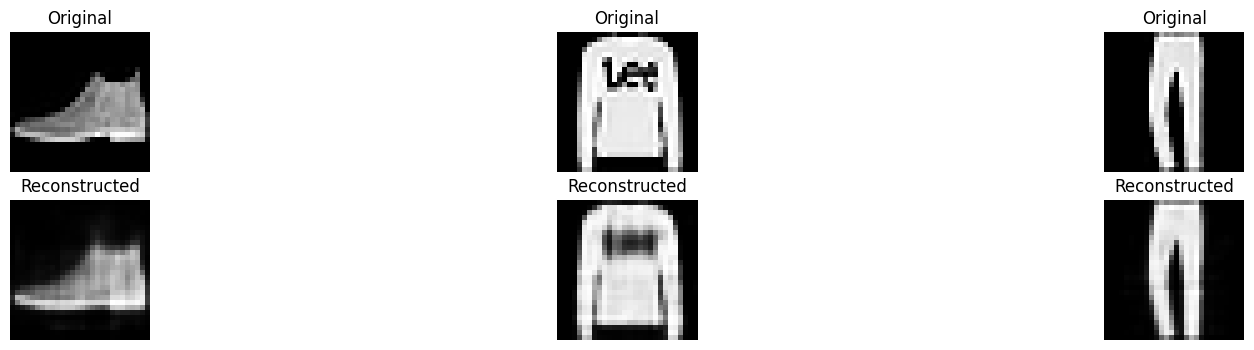

In [14]:
n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


#  Minimal Dense Autoencoder for Fashion MNIST – Summary and Learnings

## Model Summary

This implementation uses a **minimal fully-connected autoencoder** to compress and reconstruct grayscale images from the **Fashion MNIST** dataset. The model architecture consists of only two Dense layers: one for encoding (compression) and one for decoding (reconstruction).

This setup serves as a simple baseline for evaluating autoencoder performance and learning representation quality using dense layers alone.

---

##  Model Architecture

- **Input Shape**: `(784,)` (flattened 28×28 image)
- **Encoder**:
  - `Dense(64, activation='relu')` – learns a 64-dimensional compressed representation
- **Decoder**:
  - `Dense(784, activation='sigmoid')` – reconstructs the input from encoded features

---

##  Training and Optimization

- **Dataset**: Fashion MNIST (grayscale 28×28 clothing images)
- **Preprocessing**:
  - Normalize pixel values to [0, 1]
  - Flatten images to vectors of size 784
- **Loss Function**: `Mean Squared Error (MSE)`
- **Optimizer**: `Adam`
- **Evaluation**:
  - Training and validation loss plotted over epochs
  - Visual comparison between original and reconstructed images

---

##  Learnings

- A single dense encoding layer can learn basic structure and features from Fashion MNIST, but reconstructions are often blurry or lack fine detail.
- Despite its simplicity, this model can serve as a strong baseline for more complex architectures like convolutional autoencoders.
- ReLU activation in the encoder promotes sparse representations, while sigmoid in the output layer ensures pixel values remain between 0 and 1.
- Adding more layers or switching to convolutional models significantly improves image quality and feature retention.

---

##  Limitations

- Spatial features are not preserved due to flattening.
- Struggles with more detailed or color images.
- Poor performance on noisy or real-world image data without additional regularization or denoising mechanisms.

